# Final Project Instructions

● Once completed, you will submit the project as jupyter notebooks (as a single .ipynb file) through e-mail at 'tahiya.chowdhury@rutgers.edu' for grading.

● In the e-mail, use subject line: `CPSML: Final Project _ your full name`

● Both the jupyter notebook and e-mail should contain your name in English.

## Goals

In this project, you will perform:
* Data analysis and Visualization on multiple sensor dataset
* K-means Clustering on sensor data
* Dimensionality Reduction and its effect on clustering


## Data

You will use acclerometer data from sensor mounted on chest to perform the analysis. The data can be found here: https://sensor.informatik.uni-mannheim.de/#dataset_realworld_subject1

We will use Subject 1 data only. For subject 1, we will use the following activity data:
* climbing down
* lying
* running

We will use data collected from Accelerometer sensor mounted on chest only.

To download the data:
* go to the link: https://sensor.informatik.uni-mannheim.de/#dataset_realworld_subject1
* There are 8 activities data in that page. Go to `Running`. Beside the word `Accelerometer`.
* Click on `csv`. This will download a zip file in your computer. Unzip the folder. Inside the folder, choose the `csv` file named `acc_running_chest.csv` and put it in your project notebook directory (where your Final project notebook is located.)
* Do the same for Activity `Climbing Down` and `Lying`. Your notebook directory should now have 3 csv (acc_running_chest.csv, acc_climbingdown_chest.csv, acc_lying_chest.csv).

## Libraries

For this project, you will be using `pandas`, `numpy`, `scikit-learn`, `seaborn`, and `matplotlib` library to analyze and experiment on an human acivity data collected using accelerometer sensor.

In [41]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis/Cleaning

* Read the 3 csv files using `pd.read_csv` into 3 dataframes.

In [42]:
df_climb_down = pd.read_csv('./acc_climbingdown_chest.csv')  ## your data and notebook file should be in the same folder for this to work
#df_climb_down

In [43]:
## Read running data into df_running the same way

df_running = pd.read_csv('./acc_running_chest.csv')

In [44]:
## Read lying data into df_running the same way

df_lying = pd.read_csv('./acc_lying_chest.csv')

The first 10 lines of climbing down data should look like this:

In [45]:
df_climb_down.head(10)

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435996968010,5.616797,8.064270,0.878073
1,2,1435996968032,5.589264,8.054693,0.869095
2,3,1435996968052,5.580884,8.060080,0.908001
3,4,1435996968073,5.588067,8.033744,0.884658
4,5,1435996968093,5.583877,8.060678,0.875679
5,6,1435996968113,5.596446,8.047510,0.858920
6,7,1435996968131,5.609016,8.051102,0.862511
7,8,1435996968150,5.600637,8.058883,0.869694
8,9,1435996968170,5.589264,8.024167,0.891242
9,10,1435996968230,5.547365,8.076241,0.959476


There are 5 columns in each dataframe: `id, attr_time, attr_x, attr_y, attr_z`. Remove the first 2 columns (id and time) and convert the dataframe into a numpy array. You can do so in following way:

In [46]:
df_climb = df_climb_down[['attr_x', 'attr_y', 'attr_z']].values
print(df_climb.shape)           ## Check the shape of the array
print(type(df_climb))           ## Check type

(25435, 3)
<class 'numpy.ndarray'>


In [47]:
df_run = df_running[['attr_x', 'attr_y', 'attr_z']].values

print(df_run.shape)           ## Check the shape of the array
print(type(df_run))           ## Check type

(30615, 3)
<class 'numpy.ndarray'>


In [48]:
df_lie = df_lying[['attr_x', 'attr_y', 'attr_z']].values

print(df_lie.shape)           ## Check the shape of the array
print(type(df_lie))           ## Check type

(31419, 3)
<class 'numpy.ndarray'>


We will use 25000 observations from each type of activity to create a balanced dataset. 

To do that, select the first 25000 rows (each row represent an observation) from all 3 activity types.

In [49]:
df_climb = df_climb[:25000, :]

df_run = df_run[:25000, :]
df_lie =  df_lie[:25000, :]

We will concatanate all 3 types into a single dataset.  You can use `concatenate` function from numpy library.

In [50]:
df_full = np.concatenate((df_climb, df_run, df_lie), axis = 0)
df_full.shape

(75000, 3)

`df_full` should contain 75000 rows and 3 columns.

## Visualization

We will first plot the 3 dimensional data using matplotlib. For climbing down data it looks as following:

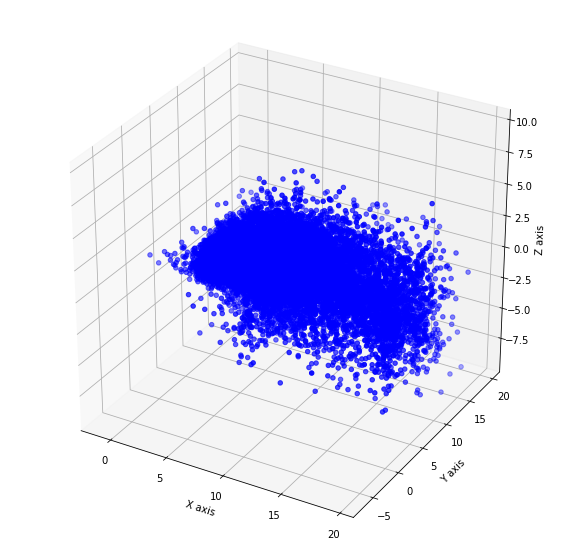

In [51]:
from mpl_toolkits.mplot3d import Axes3D     ## this will allow us to perform 3-D plotting

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_climb[:, 0], df_climb[:, 1], df_climb[:, 2], marker = 'o', color = 'b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

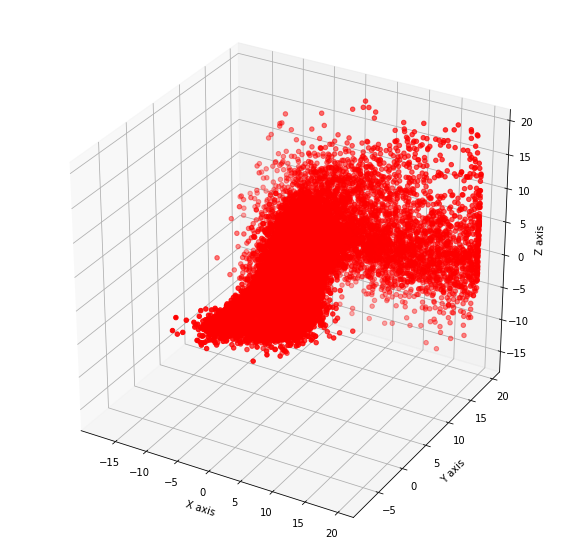

In [52]:
# perform same 3d plotting for running data

from mpl_toolkits.mplot3d import Axes3D     ## this will allow us to perform 3-D plotting

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_run[:, 0], df_run[:, 1], df_run[:, 2], marker = 'o', color = 'r')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


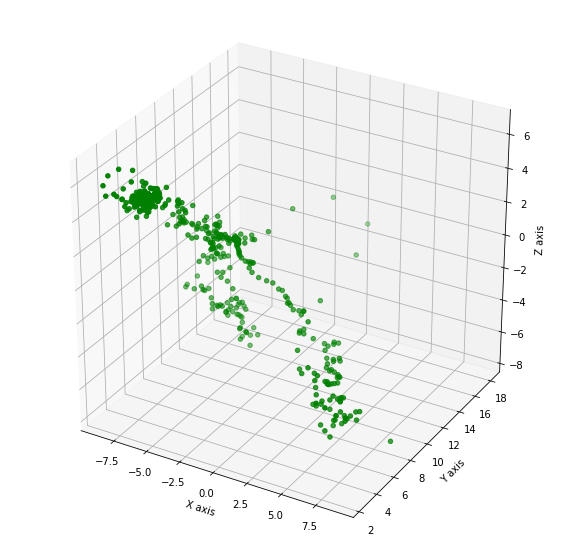

In [53]:
# perform same 3d plotting for lying data

from mpl_toolkits.mplot3d import Axes3D     ## this will allow us to perform 3-D plotting

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_lie[:, 0], df_lie[:, 1], df_lie[:, 2], marker = 'o', color = 'g')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()



### Do the 3 activity data looks the same or different in the plotted figures? Observe the figures to understand why they are different.

The data represents 3 different activities. All activities lie in thr positive region of y-axis.
- Climbing is only positive for x-axis, ranges between positive and negative values for z-axis
- Running data ranges between positive and negative for both x and z axis.
- Lying data ranges between positive and negative for both x and z axis. Y axis value is almost unchnaged for all points.

You will see the evidence of these observations in distribution plots.

We can also plot them in their distribution.

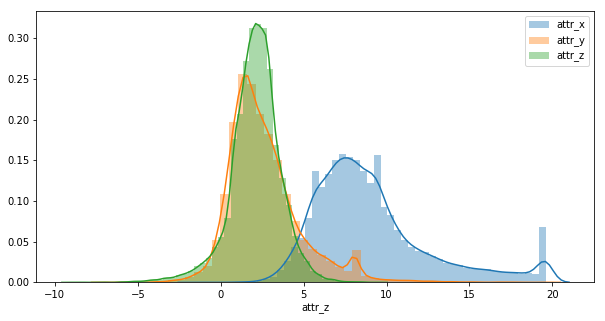

In [54]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax = sns.distplot(df_climb_down['attr_x'], label = "attr_x")
ax = sns.distplot(df_climb_down['attr_y'], label = "attr_y")
ax = sns.distplot(df_climb_down['attr_z'], label = "attr_z")
plt.legend()

Plot similar distribution plots for running and lying dataset. 

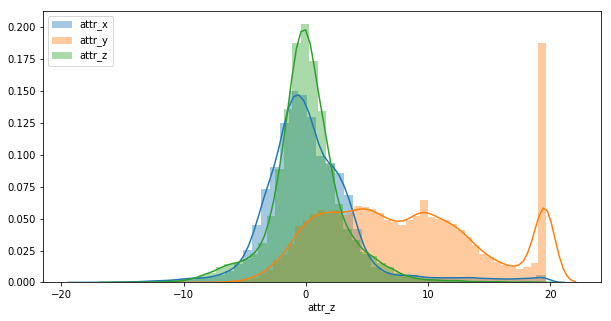

In [58]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax = sns.distplot(df_running['attr_x'], label = "attr_x")
ax = sns.distplot(df_running['attr_y'], label = "attr_y")
ax = sns.distplot(df_running['attr_z'], label = "attr_z")
plt.legend()

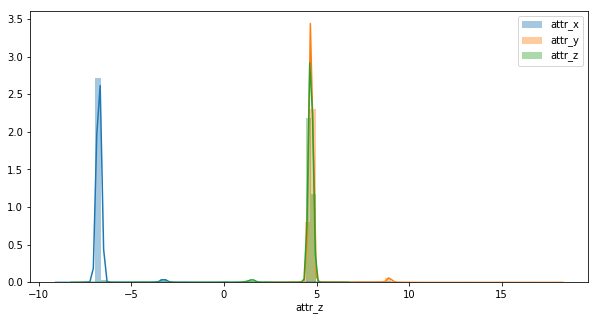

In [59]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax = sns.distplot(df_lying['attr_x'], label = "attr_x")
ax = sns.distplot(df_lying['attr_y'], label = "attr_y")
ax = sns.distplot(df_lying['attr_z'], label = "attr_z")
plt.legend()

* Are the distributions along different axis different? - Yes. (See scatter plots above and pairplots below for closer obsrvation).
* Are the distributions for different activities different? - Yes.

We can also plot the data in 2d plane to understand the correlation and other patterns existing between x, y, z axis using `sns.pairplot`.

In [60]:
df_climb_pair = df_climb_down[['attr_x', 'attr_y', 'attr_z']]

df_run_pair = df_running[['attr_x', 'attr_y', 'attr_z']]    
df_lie_pair = df_lying[['attr_x', 'attr_y', 'attr_z']]

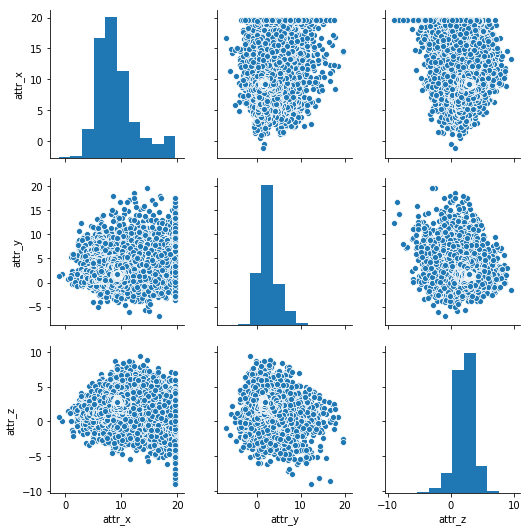

In [61]:
pair = sns.pairplot(df_climb_pair)     

Do the same for running and lying data to understand relationship between x, y, z axis.

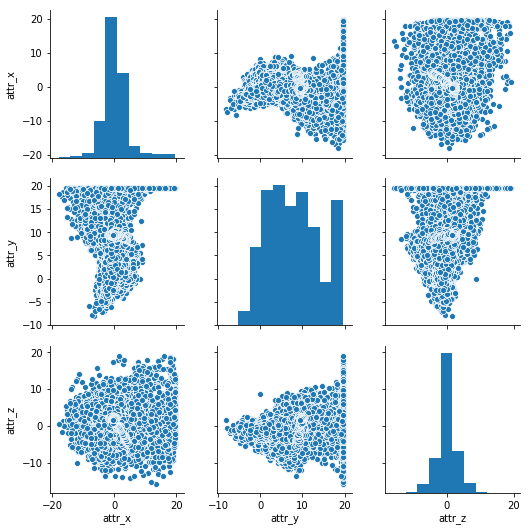

In [62]:
pair = sns.pairplot(df_run_pair)  

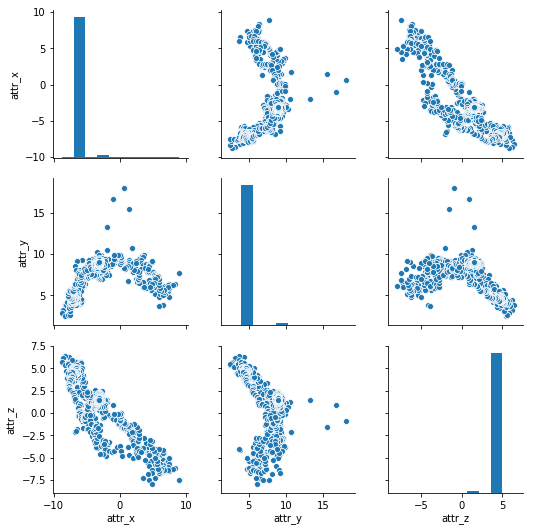

In [63]:
pair = sns.pairplot(df_lie_pair)  

Our pairplots reveal patterns existing between different axis. We can observe:

- Climbing data does not reveal much pattern.
- Running data shows heteroscedasticity (unequal variability) between x and y axis and y and z axis. Heteroscedasticity introduces a horizontal cone-shape structure in the plot of data. This is a problem for regression models.
- Lying data shows negative correlation between z and x axis (when z increases, x decreases).

These observations can be confirmed from the scatterplots above as well.


## We will now apply k-means clustering method to cluster the combined dataset including the 3 types of activity.

Text(0, 0.5, 'y_axis')

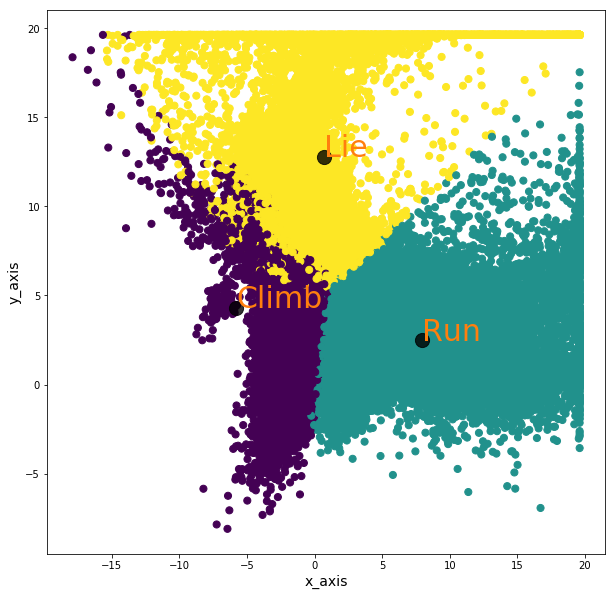

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_full)
y_kmeans = kmeans.predict(df_full)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_full[:, 0], df_full[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

labels = ['Climb', 'Run', 'Lie']
for i,txt in enumerate(labels):  
    ax.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize = 30, color = 'tab:orange')

ax.set_xlabel('x_axis', fontsize = 14)
ax.set_ylabel('y_axis', fontsize = 14)

Text(0, 0.5, 'z_axis')

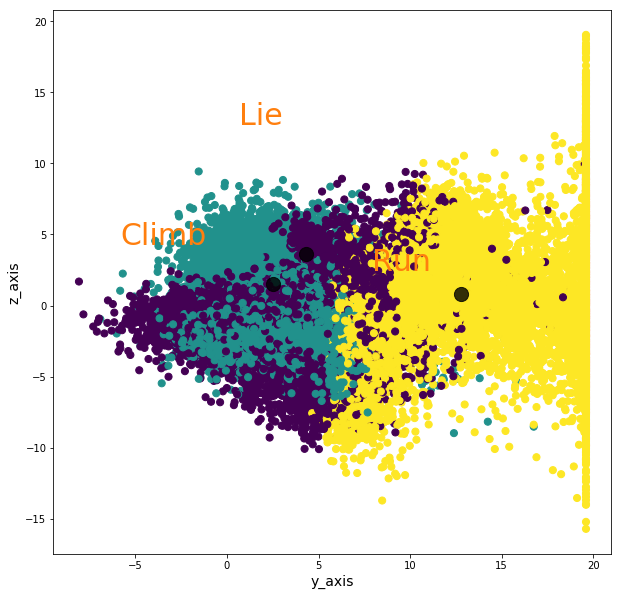

In [65]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_full[:, 1], df_full[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.8);

labels = ['Climb', 'Run', 'Lie']
for i,txt in enumerate(labels):  
    ax.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize = 30, color = 'tab:orange')

ax.set_xlabel('y_axis', fontsize = 14)
ax.set_ylabel('z_axis', fontsize = 14)

Text(0, 0.5, 'z_axis')

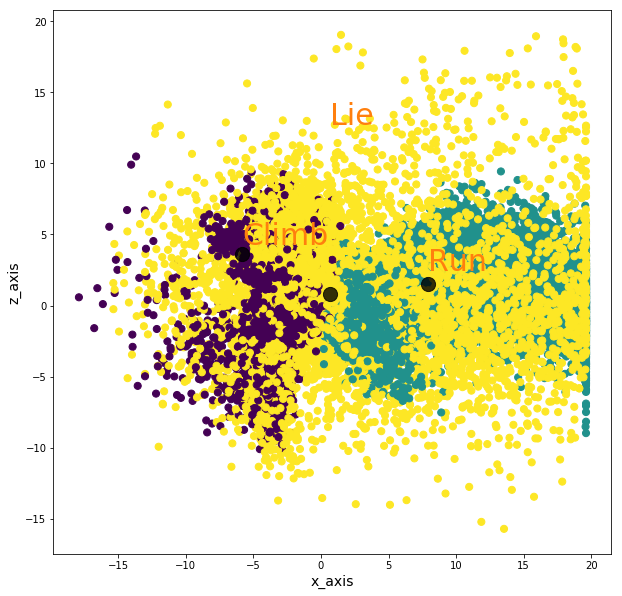

In [66]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_full[:, 0], df_full[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.8);

labels = ['Climb', 'Run', 'Lie']
for i,txt in enumerate(labels):  
    ax.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize = 30, color = 'tab:orange')

ax.set_xlabel('x_axis', fontsize = 14)
ax.set_ylabel('z_axis', fontsize = 14)

In [67]:
#Looking at the predicted labels
predicted_labels = kmeans.labels_
print(predicted_labels)

[1 1 1 ... 0 0 0]


## Dimensionality Reduction

- We will apply dimensionality reduction to improve clustering result. 
- Dimensionality reduction using PCA (Principal Component Analysis) can help us transform the 3-d data to 2-d while retaining sources of variation in data.

Text(0, 0.5, 'Component 2')

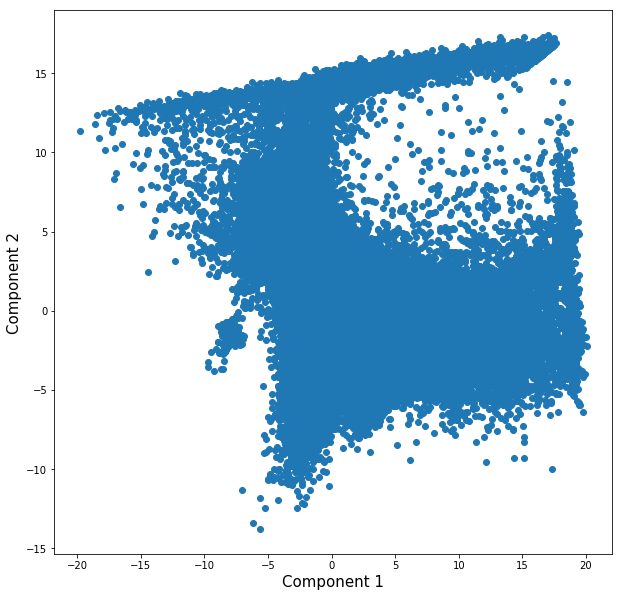

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)             # 2 principal components
pca.fit(df_full)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

X_hat = pca.transform(df_full)
X_hat.shape
plt.scatter(X_hat[:,0], X_hat[:,1])
plt.xlabel("Component 1", fontsize = 15)
plt.ylabel("Component 2", fontsize = 15)

In [69]:
print("Explained variance by component 1: ", pca.explained_variance_ratio_[0])
print("Explained variance by component 2: ", pca.explained_variance_ratio_[1])

print("Total explained variance by 2 principal components: ", np.sum(pca.explained_variance_ratio_))

Explained variance by component 1:  0.6659097444262778
Explained variance by component 2:  0.24975592075710842
Total explained variance by 2 principal components:  0.9156656651833862


Notice that after applying dimesnionality reduction to 3-D data to 2 principal components, the amount of variance retained is ~91%. The common practice is to retain retain 90%.

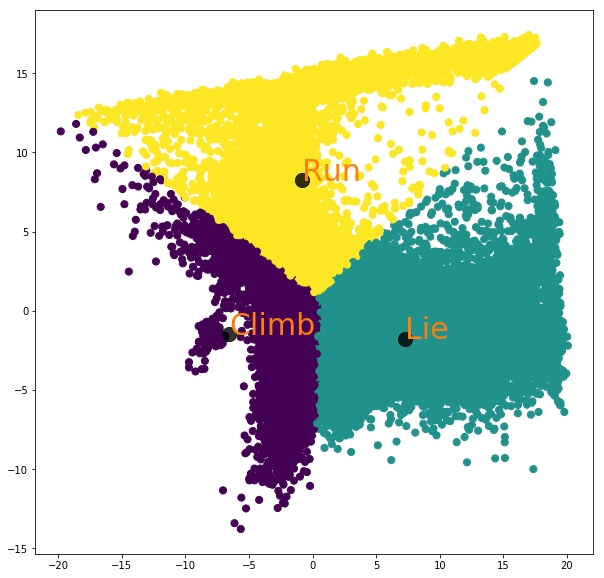

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_hat)
y_kmeans = kmeans.predict(X_hat)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(X_hat[:, 0], X_hat[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);
#print(centers.shape)

labels = ['Climb', 'Lie', 'Run']
for i,txt in enumerate(labels):  
    ax.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize = 30, color = 'tab:orange')

By observing the clustering result, you can see clusteirng results have improved by better distinguished boundaries.